In [13]:
import sys
!{sys.executable} -m pip install selenium
!{sys.executable} -m pip install bs4
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install requests_html
!{sys.executable} -m pip install nest_asyncio

You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import urllib.request
import time
import re

In [2]:
cities = ['Sacramento', 'Elk Grove', 'Citrus Heights', 'Folsom', \
          'Rancho Cordova', 'Galt', 'Isleton', 'Unincorporated Area']

# Read File

In [3]:
past_cases = []
past_deaths = []
past_dates = []

with open("cases.txt") as f:
    past_cases = f.read().split('\n')
    
for i in range(len(past_cases)):
    past_cases[i] = past_cases[i].split(' ')

with open("deaths.txt") as f:
    past_deaths = f.read().split('\n')
    
for i in range(len(past_deaths)):
    past_deaths[i] = past_deaths[i].split(' ')
    
with open("dates.txt") as f:
    past_dates = f.read().split('\n')

# Web Scrape

In [4]:
url = 'https://www.saccounty.net/COVID-19/Pages/default.aspx'
#url = 'https://sac-epidemiology.maps.arcgis.com/apps/MapSeries/index.html?appid=e11bc926165742ab99f834079f618dad'
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.text, "html.parser")

In [6]:
stats = soup.findAll('td')[-8:]

In [7]:
counts = np.array([re.findall(r'[\d,]+', str(stats[i])) for i in range(len(stats))])
new_cases = list(counts[:,0])
new_deaths = list(counts[:,1])
today = date.today().strftime("%m/%d/%Y")

In [8]:
new_cases = [x.replace(',', '') for x in new_cases]

past_cases.append(new_cases)
past_deaths.append(new_deaths)
past_dates.append(today)

#past_cases = [new_cases]
#past_deaths = [new_deaths]

# Visualize Cases

In [9]:
df_cases = pd.DataFrame(past_cases)

In [10]:
df_cases.columns = cities + ['Increase']
df_cases.index = past_dates

In [11]:
df_cases = df_cases.reset_index()
df_cases = df_cases.rename(columns={'index':'Date'})
df_cases

,Date,Sacramento,Elk Grove,Citrus Heights,Folsom,Rancho Cordova,Galt,Isleton,Unincorporated Area,Increase
0,06/12/2020,960,124,103,56,137,24,3,288,0
1,06/13/2020,966,126,104,57,138,24,3,289,12
2,06/14/2020,987,129,105,57,143,25,4,294,37
3,06/15/2020,1011,134,106,58,148,25,4,299,41
4,06/16/2020,1025,136,108,59,149,29,4,306,31
5,06/17/2020,1059,142,114,61,151,36,4,314,65
6,06/18/2020,1093,145,114,63,152,38,4,318,46
7,06/19/2020,1111,151,114,63,156,43,4,321,36
8,06/20/2020,1168,168,112,67,159,52,5,325,93
9,06/21/2020,1222,180,114,68,163,56,6,339,92


In [12]:
total_case_increase = 0

def get_increase(df, city):
    last_two_days = df[city].tail(2)
    return (int(last_two_days.tail(1)) - int(last_two_days.head(1)))

def draw_graph(df, city, increase=True):
    
    if increase:
        last_two_days = df[city].tail(2)
        increase = int(last_two_days.tail(1)) - int(last_two_days.head(1))
        if increase >= 0:
            print("+" + str(increase))
        else:
            print(str(increase))
    
    plt.plot(range(len(df)), pd.to_numeric(df[city]))
    plt.xticks(range(len(df)), df['Date'])
    plt.xticks(rotation=90)
    plt.title(city.upper())
    plt.savefig(f"{city}.png")
    plt.show()
    
    return increase

+110


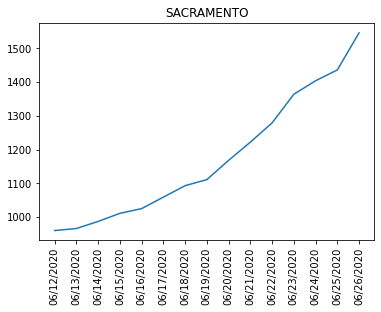

+19


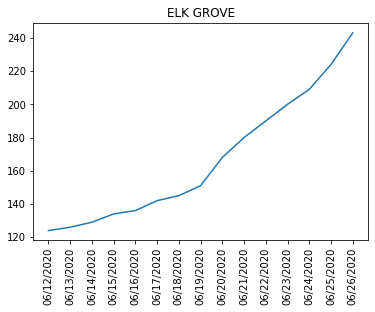

+1


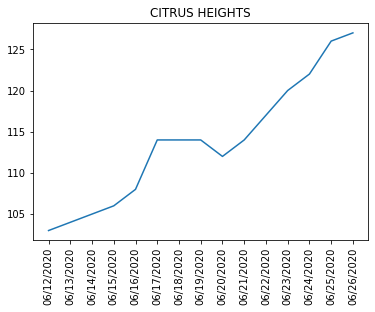

+5


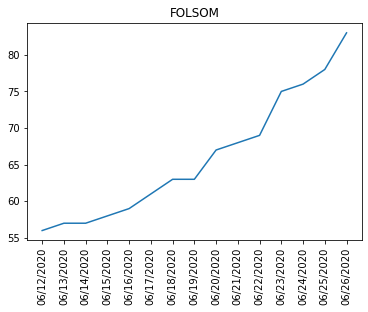

-1


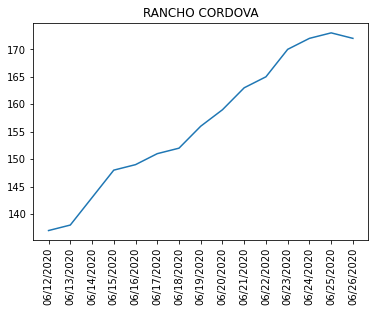

+4


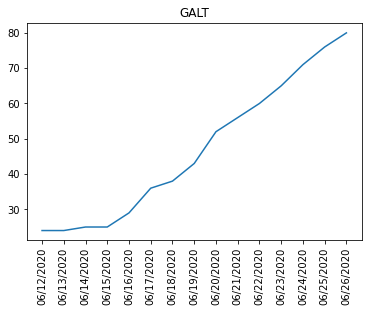

+2


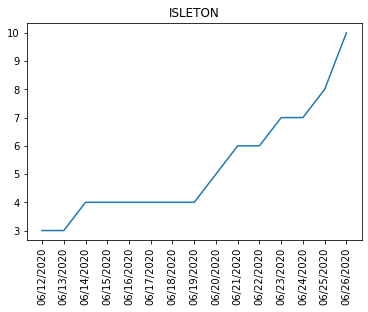

+17


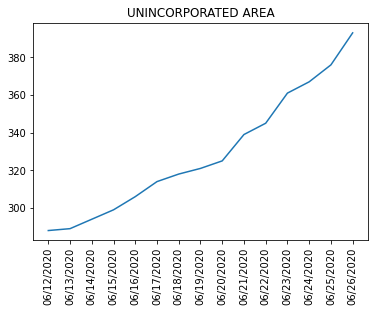

In [13]:
for city in cities:
    total_case_increase += draw_graph(df_cases, city)

In [14]:
df_cases.loc[df_cases['Date'] == today, 'Increase'] = total_case_increase
total_case_increase

157

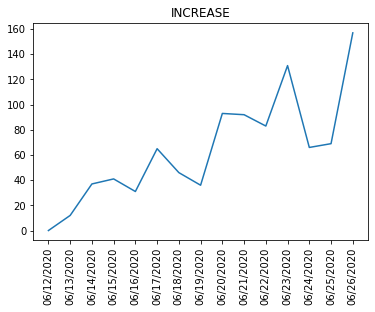

False

In [15]:
draw_graph(df_cases, 'Increase', False)

# Visualize Deaths

In [16]:
df_deaths = pd.DataFrame(past_deaths)
df_deaths.columns = cities + ['Increase']
df_deaths.index = past_dates
df_deaths = df_deaths.reset_index()
df_deaths = df_deaths.rename(columns={'index':'Date'})
df_deaths

,Date,Sacramento,Elk Grove,Citrus Heights,Folsom,Rancho Cordova,Galt,Isleton,Unincorporated Area,Increase
0,06/12/2020,28,3,8,3,6,0,0,12,0
1,06/13/2020,29,3,8,3,7,0,0,12,2
2,06/14/2020,30,3,8,3,7,0,0,12,1
3,06/15/2020,30,3,8,3,7,0,0,12,0
4,06/16/2020,30,3,8,3,7,0,0,12,0
5,06/17/2020,31,3,8,3,7,0,0,15,4
6,06/18/2020,31,3,8,3,7,0,0,15,0
7,06/19/2020,31,3,8,3,7,0,0,15,0
8,06/20/2020,31,3,8,3,7,0,0,15,0
9,06/21/2020,31,3,8,3,7,0,0,14,-1


+0


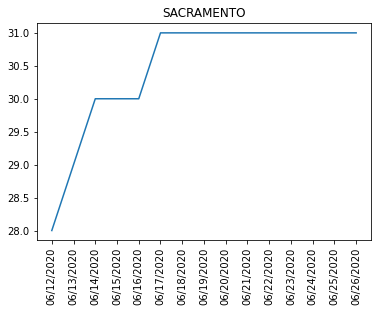

+0


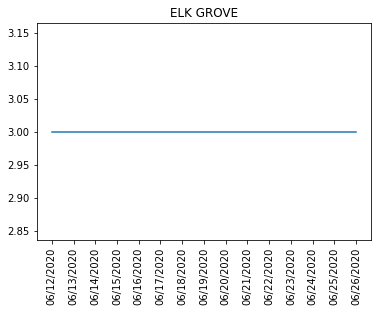

+0


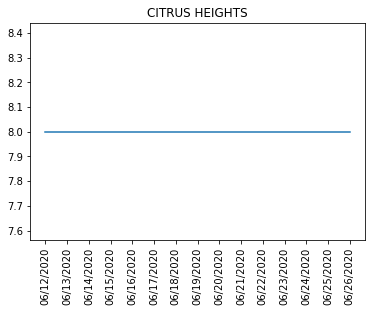

+0


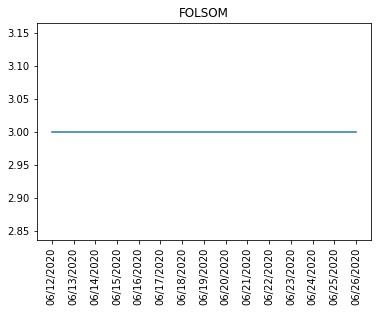

+0


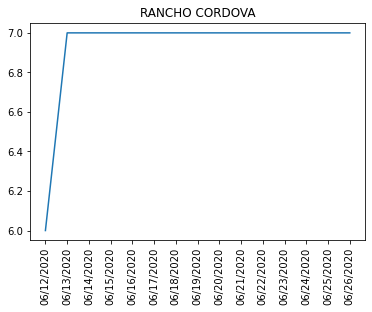

+0


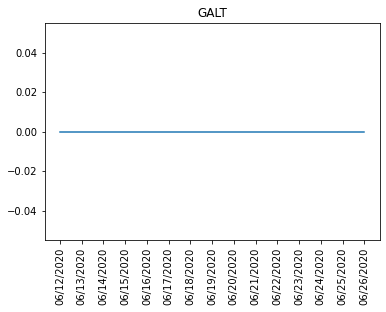

+0


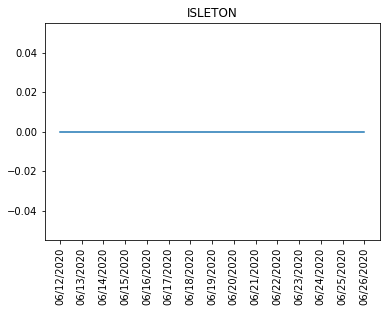

+0


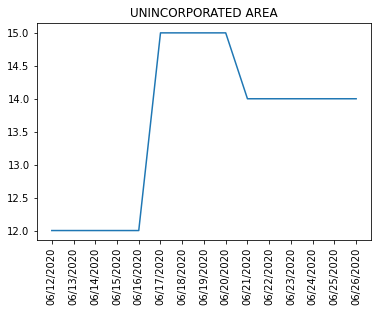

In [17]:
total_death_increase = 0
for city in cities:
    total_death_increase += draw_graph(df_deaths, city)

In [18]:
df_deaths.loc[df_deaths['Date'] == today, 'Increase'] = total_death_increase
total_death_increase

0

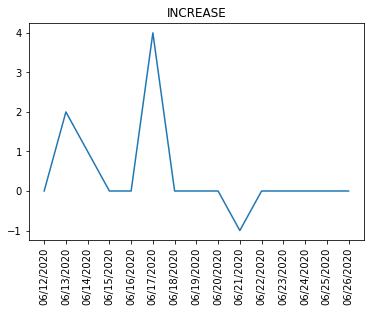

False

In [19]:
draw_graph(df_deaths, 'Increase', False)

# Write File

In [20]:
f = open("cases.txt", "a")
f.write('\n')
for x in new_cases:
    f.write(x + ' ')
f.write(str(total_case_increase))
f.close()

f = open("deaths.txt", "a")
f.write('\n')
for x in new_deaths:
    f.write(x + ' ')
f.write(str(total_death_increase))
f.close()

f = open("dates.txt", "a")
f.write('\n' + str(today))
f.close()

In [21]:
import smtplib

def send_email(receivers):
    sender = 'cooraymelanie@gmail.com'
    
    message = f"""From: Melanie Cooray <cooraymelanie@gmail.com>
    To: You <ruchira.k.liyanage@gmail.com>
    Subject: COVID-19 Sacramento County +{today}

    Sacramento County increase today: {total_case_increase}

    City of Sacramento: +{get_increase(df_cases, 'Sacramento')}
    City of Rancho Cordova: +{get_increase(df_cases, 'Rancho Cordova')}
    City of Folsom: +{get_increase(df_cases, 'Folsom')}
    City of Elk Grove: +{get_increase(df_cases, 'Elk Grove')}
    City of Citrus Heights: +{get_increase(df_cases, 'Citrus Heights')}
    City of Galt: +{get_increase(df_cases, 'Galt')}
    City of Isleton: +{get_increase(df_cases, 'Isleton')}
    City of Unincorporated Area: +{get_increase(df_cases, 'Unincorporated Area')}
    """

    try:
        server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        server.ehlo()
        server.login(sender, '*****')
        server.sendmail(sender, receivers, message)
        server.close()        
        print("Successfully sent email")
    except smtplib.SMTPException:
        print("Error: unable to send email")

In [22]:
send_email(['melaniecooray@berkeley.edu'])

Successfully sent email


In [23]:
send_email(['ruchira.k.liyanage@gmail.com'])

Successfully sent email


In [32]:
import smtplib
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart

port = 2525
smtp_server = "smtp.mailtrap.io"
login = "cooraymelanie@gmail.com" # paste your login generated by Mailtrap
password = "*****" # paste your password generated by Mailtrap

sender_email = "cooraymelanie@gmail.com"
receiver_email = "melaniecooray@berkeley.edu"
message = MIMEMultipart("alternative")
message["Subject"] = "CID image test"
message["From"] = sender_email
message["To"] = receiver_email

# write the HTML part
html = """\
<html>
 <body>
   <img src="cid:Mailtrapimage">
 </body>
</html>
"""

part = MIMEText(html, "html")
message.attach(part)

# We assume that the image file is in the same directory that you run your Python script from
fp = open('Folsom.png', 'rb')
image = MIMEImage(fp.read())
fp.close()

# Specify the  ID according to the img src in the HTML part
image.add_header('Content-ID', '<Mailtrapimage>')
message.attach(image)

# send your email
with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
    server.login(login, password)
    server.sendmail(
       sender_email, receiver_email, message.as_string()
   )
print('Sent')

Sent
